In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec

## Commits

In [2]:
file_name = "../data/CommitFrequency.csv"
commit_freq_all_df = pd.read_csv(file_name)

In [3]:
commit_freq_all_df.head(n=6)
np.array(commit_freq_all_df.iloc[:, 0])

array([507,   2,   3, ...,   1,   2,   8])

In [4]:
def plot_all_commits(df:pd.DataFrame):
    ## Breaking Y Axis:
    ## https://stackoverflow.com/questions/32185411/break-in-x-axis-of-matplotlib
    plt.figure(figsize=(6,6))
    plt.hist(np.array(df.iloc[:, 0]), bins=50)
    plt.title("Code revisions per SO link")
    plt.xlabel("Number of Revisions")
    plt.ylabel("Number of so References")

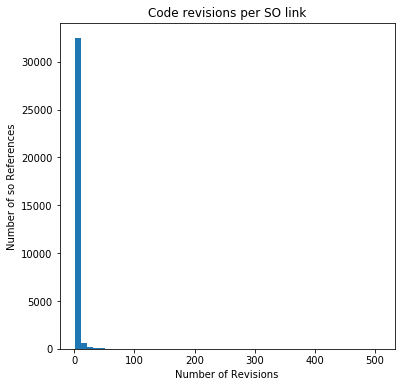

In [5]:
plot_all_commits(commit_freq_all_df)

In [6]:
x = np.linspace(0,10,100)

In [7]:
x

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96

In [8]:
def plot_histogram(df:pd.DataFrame, xlim, ylim, x_breaks, y_breaks,
                   xlabel="", ylabel="", outfile="abc.png", title="", sections=[0,1,2,3]):
    fig = plt.figure(figsize=(10,10))
    gs1 = gridspec.GridSpec(2, 2, figure=fig)
    gs1.update(wspace=0.07, hspace=0.05) 
    
    
    # Bins to control
    binwidth = 1
    bins=range(0, 550 + binwidth, binwidth)
    
    
    # zoom-in / limit the view to different portions of the data
    lower_x_break = x_breaks[0]
    upper_x_break = x_breaks[1]
    lower_y_break = y_breaks[0]
    upper_y_break = y_breaks[1]
    
    # set the spacing between axes. 
    ## Following : https://matplotlib.org/examples/pylab_examples/broken_axis.html
    ## And https://stackoverflow.com/questions/20057260/how-to-remove-gaps-between-subplots-in-matplotlib/45487279
    
    # If we were to simply plot pts, we'd lose most of the interesting
    # details due to the outliers. So let's 'break' or 'cut-out' the y-axis
    # into two portions - use the top (ax) for the outliers, and the bottom
    # (ax2) for the details of the majority of our data
    
    # | 0 | 1 |
    #  ______
    # | 2 | 3 |
    if (0 in sections):
        ax0 = plt.subplot(gs1[0])
        ax0.hist(np.array(df.iloc[:, 0]), bins) #color='orange'
        ax0.set_ylim(upper_y_break, ylim)  # outliers only
        ax0.set_xlim(0, lower_x_break)
        if 2 in sections:
            ax0.spines['bottom'].set_visible(False)
        ax0.xaxis.tick_top()
        ax0.tick_params(labeltop='off')  # don't put tick labels at the top
        if 1 in sections:
            ax0.spines['right'].set_visible(False)
        ax0.yaxis.tick_left()
        
    if 1 in sections:
        ax1 = plt.subplot(gs1[1])
        ax1.hist(np.array(df.iloc[:, 0]), bins)
        ax1.set_ylim(upper_y_break, ylim)
        ax1.set_xlim(upper_x_break, xlim)
        if (3 in sections) :
            ax1.spines['bottom'].set_visible(False)
        ax1.xaxis.tick_top()
    
        ax1.tick_params(labeltop='off')  # don't put tick labels at the top
        if 0 in sections:
            ax1.spines['left'].set_visible(False)
        ax1.yaxis.tick_right()
        
    if 2 in sections:   
        ax2 = plt.subplot(gs1[2])
        ax2.hist(np.array(df.iloc[:, 0]), bins) #color='orange'
        ax2.set_xlim(0, lower_x_break)
        ax2.set_ylim(0, lower_y_break)  # most of the data
        if 0 in sections:
            ax2.spines['top'].set_visible(False)
        ax2.xaxis.tick_bottom()
        if 3 in sections:
            ax2.spines['right'].set_visible(False)
        ax2.yaxis.tick_left()
        
    if 3 in sections:
        ax3 = plt.subplot(gs1[3])
        #f, (ax, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,10))
        # plot the same data on both axes
        ax3.hist(np.array(df.iloc[:, 0]), bins)
        ax3.set_ylim(0, lower_y_break)
        ax3.set_xlim(upper_x_break, xlim)
        if 1 in sections:
            ax3.spines['top'].set_visible(False)
        ax3.xaxis.tick_bottom()
        if 2 in sections:
            ax3.spines['left'].set_visible(False)
        ax3.yaxis.tick_right()
    # This looks pretty good, and was fairly painless, but you can get that
    # cut-out diagonal lines look with just a bit more work. The important
    # thing to know here is that in axes coordinates, which are always
    # between 0-1, spine endpoints are at these locations (0,0), (0,1),
    # (1,0), and (1,1).  Thus, we just need to put the diagonals in the
    # appropriate corners of each of our axes, and so long as we use the
    # right transform and disable clipping.

    d = .005  # how big to make the diagonal lines in axes coordinates
    # arguments to pass to plot, just so we don't keep repeating them
    if 0 in sections:
        kwargs = dict(transform=ax0.transAxes, color='k', clip_on=False)
        ax0.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
        ax0.plot((1-d, 1+d), (1-d, 1+d), **kwargs)
    
    
    if (1 in sections) :
        kwargs.update(transform=ax1.transAxes)  # switch to the bottom axes
        ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal
        ax1.plot(( - d,  + d), (1-d, 1+d), **kwargs)
    
    
    if (2 in sections) :
        kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
        ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
        ax2.plot((1-d, 1+d), (- d, + d), **kwargs)  # bottom-left diagonal
    
    
    if (3 in sections) :
        kwargs.update(transform=ax3.transAxes)  # switch to the bottom axes
        ax3.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal
        ax3.plot((- d,  + d), ( - d,  + d), **kwargs)
    #     kwargs = dict(transform=ax0.transAxes, color='k', clip_on=False)
    #     ax0.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
    

    # What's cool about this is that now if we vary the distance between
    # ax and ax2 via f.subplots_adjust(hspace=...) or plt.subplot_tool(),
    # the diagonal lines will move accordingly, and stay right at the tips
    # of the spines they are 'breaking'
    
    
    ### Labels
    ax2.set_ylabel(ylabel, linespacing=3)
    ax2.set_xlabel(xlabel, linespacing=3)
    
    fig.suptitle(title)
#     plt.show()
    plt.savefig(outfile)


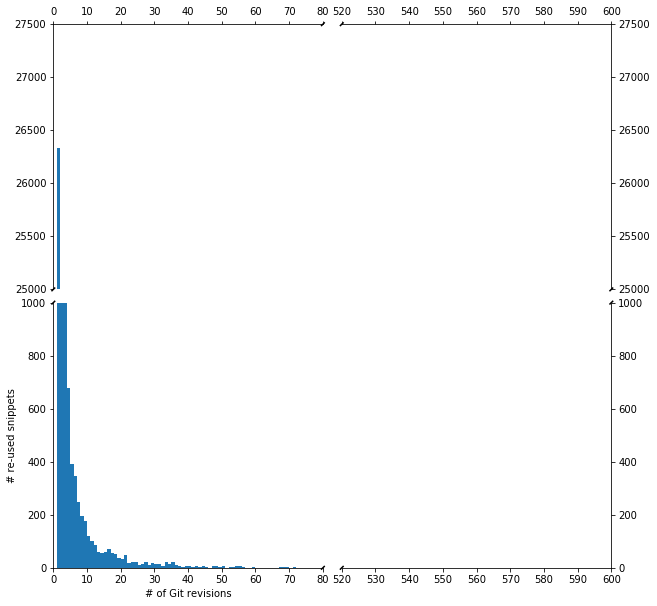

In [9]:
plot_histogram(commit_freq_all_df, xlim=600,
               ylim=27500, x_breaks=[80, 520], y_breaks=[1000, 25000],
              xlabel='# of Git revisions', ylabel= '# re-used snippets',
               outfile='GHRvsSOR.png',
              title="")

In [10]:
two_commits_df = commit_freq_all_df[commit_freq_all_df.iloc[:, 0] >= 2]

In [11]:
two_commits_df

,CommitCount
0,507
1,2
2,3
4,3
5,2
6,2
11,3
14,2
20,2
22,7


In [ ]:
plot_histogram(two_commits_df, xlim=100,
               ylim=3000, x_breaks=[40, 50], y_breaks=[1200, 2500],
               xlabel='# of Git revisions', ylabel= '# re-used snippets',
               outfile='GHRvsSOR2Commits.png',
              title="",
              sections=[0,2])

In [ ]:
len(commit_freq_all_df)

In [ ]:
len(commit_freq_all_df) - len(two_commits_df)

## Edit count for SO posts


In [ ]:
so_df = pd.read_csv("/Users/saraj/Desktop/TempThesisDataFiles/PostEditCount.csv")

In [ ]:
so_df.head()

In [ ]:
new_df = so_df[['EditCount']]

In [ ]:
new_df.head()

In [ ]:
plot_histogram(new_df, xlim=100,
               ylim=600, x_breaks=[40, 50], y_breaks=[300, 400],
               xlabel='# edits', ylabel='# SO Snippets',
               outfile='SOEdits.png',
              title="",
              sections=[0,2])

## Plotting Orig Author vs Non Orig Authors 

In [ ]:
def plot_authors_distribution(df:pd.DataFrame, col_names:list, xlabel, ylabel,
                              outfile:str="SomeName", color=None, esc=None):
    assert len(col_names) == 2, "Need 2 column names exactly"
    percentage_authors = df[col_names[0]] / df[col_names[1]]
    plt.figure(figsize=(10,10))
    if not color:
        color = 'skyblue'
        esc = "darkblue"
    plt.hist(percentage_authors, bins=50, color=color, ec=esc)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    plt.savefig(outfile)
    plt.show()
## Test


In [ ]:
dir_name = "/Users/saraj/PycharmProjects/AnalysisScripts/Data/"
file_name = "SOOrigVsNonOrigAuthors.csv"
SO_authors_df = pd.read_csv(dir_name + file_name)

In [ ]:
SO_authors_df.head()

In [ ]:
plot_authors_distribution(SO_authors_df,
                          ["OrigAuthorEditsCnt", "TotalEdits"],
                          xlabel="% Edits by original Author",
                         ylabel="Number of SO posts", outfile="SOOrigVsNonOrigAuthors.png",
                          color='orange', esc='darkorange')

In [ ]:
gh_author_file_name = "OrigAuthorVsNonOrigAuthor.csv"
GH_author_df = pd.read_csv(dir_name + gh_author_file_name)
one_commit_df = GH_author_df['NumberOfCommits'] == 1
GH_author_df_refined = GH_author_df[~one_commit_df]
GH_author_df_refined.head()

In [ ]:
plot_authors_distribution(GH_author_df_refined,
                          ["Commits By Orig Author", "NumberOfCommits"],
                          xlabel="% revisions by original Author",
                         ylabel="Number of Code Snippets", 
                          outfile="GHOrigVsNonOrigAuthors.png", color='blue', esc='darkblue')

In [ ]:
total_cnt = 0
heat_map = {}
author_ratio_post_map = {}
for index, row in GH_author_df_refined.iterrows():
    number_of_edits = row['NumberOfCommits']
    percent_of_orig = row['Commits By Orig Author'] / number_of_edits
    percent_of_orig = str(round(percent_of_orig, 2))
    if percent_of_orig in author_ratio_post_map.keys():
        author_ratio_post_map[percent_of_orig] += 1
    else:
        author_ratio_post_map[percent_of_orig] = 1
    total_cnt += 1
        
# for key in author_ratio_post_map.keys():
#     heat_map[(key, author_ratio_post_map[key])] = float(key)
for index, row in GH_author_df_refined.iterrows():
    number_of_edits = row['NumberOfCommits']
    class_of_edits = 7 if number_of_edits >= 7 else number_of_edits
    percent_of_orig = row['Commits By Orig Author'] / number_of_edits
    percent_of_orig = str(round(percent_of_orig, 2))
    heat_map[(percent_of_orig, author_ratio_post_map[percent_of_orig])] = class_of_edits

    

In [ ]:
heat_map.values()

In [ ]:
ser = pd.Series(list(heat_map.values()),
                  index=pd.MultiIndex.from_tuples(heat_map.keys()))
heat_df = ser.unstack().fillna(0)
heat_df.shape

In [ ]:
import seaborn as sns
sns.heatmap(heat_df);

In [ ]:
## Try graphs from this link: https://towardsdatascience.com/the-art-of-effective-visualization-of-multi-dimensional-data-6c7202990c57


In [ ]:
file_name_new="/Users/saraj/PycharmProjects/AnalysisScripts/Data/SOOrigVsNonOrigAuthors-2.csv"
SO_edit_authors = pd.read_csv(file_name_new)
SO_edit_authors.head()

In [ ]:
import matplotlib
outfile="SOContributors.png"
font = {'family' : 'normal',
        'size'   : 10}
plt.rcParams.update({'font.size': 10})
plt.rc('axes', labelsize=16)

matplotlib.rc('font', **font)
SO_edit_authors = SO_edit_authors[SO_edit_authors["EditNumber"] < 40]
SO_edit_authors = SO_edit_authors[SO_edit_authors["EditNumber"] > 0]
edit_numbers = np.array(SO_edit_authors["EditNumber"])
orig_authors = np.array(SO_edit_authors["OrigAuthorEdits"])
SO_edit_authors['NotOrigAuthor'] = SO_edit_authors["NumberOfPosts"] - SO_edit_authors["OrigAuthorEdits"]
non_orig_authors = np.array(SO_edit_authors["NotOrigAuthor"])
print (SO_edit_authors.head(n=6))
plt.figure(figsize=(10,10))

width = 0.35 
p1 = plt.bar(edit_numbers, orig_authors, width)
p2 = plt.bar(edit_numbers, non_orig_authors, width, bottom=orig_authors)
plt.ylabel('Number of Posts')
# plt.title('Contributions by Orig Author vs Non-original author')
plt.xlabel('Edit Number')
# plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
# plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Original Author', 'Non-Original Author'))
plt.savefig(outfile)
#plt.show()
plt.show()

In [ ]:
edit_numbers

#### GH Author distribution

In [ ]:
gh_file_name_new="/Users/saraj/PycharmProjects/AnalysisScripts/Data/OrigAuthorVsNonOrigAuthor-2.csv"
gh_edit_authors = pd.read_csv(gh_file_name_new)
gh_edit_authors.head()

In [ ]:
outfile="GHContributors.png"
gh_edit_authors = gh_edit_authors[gh_edit_authors["CommitNumber"] > 0]
gh_edit_authors = gh_edit_authors[gh_edit_authors["CommitNumber"] < 72]

edit_numbers = np.array(gh_edit_authors["CommitNumber"])
orig_authors = np.array(gh_edit_authors["OrigAuthorCommits"])
gh_edit_authors["NotOrigAuthor"] = gh_edit_authors["NumberOfSnips"] - gh_edit_authors["OrigAuthorCommits"]
non_orig_authors = np.array(gh_edit_authors["NotOrigAuthor"])
print (SO_edit_authors.head(n=6))
plt.figure(figsize=(10,10))

width = 0.35 
p1 = plt.bar(edit_numbers, orig_authors, width)
p2 = plt.bar(edit_numbers, non_orig_authors, width, bottom=orig_authors)
plt.ylabel('Number of Code Snippets')
plt.title('')
plt.xlabel('Revision Number')
# plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
# plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Original Author', 'Non-Original Author'))
plt.savefig(outfile)
plt.show()

In [ ]:
evolution_df = pd.read_csv("/Users/saraj/PycharmProjects/AnalysisScripts/Data/COEvolutionTimeLine.csv")
evolution_df.head()

In [ ]:
evolution_df["TimeSTamp"] += 4189

In [ ]:
evolution_df.head()

In [ ]:
time_line = np.array(evolution_df["TimeSTamp"])
post_evolving = np.array(evolution_df["NumberOfPostsEvolving"])
post_created = np.array(evolution_df["NumberOfPostsCreated"])
code_snippets_evolving = np.array(evolution_df["NumberOfCodeSnipsEvolving"])
code_snippets_created = np.array(evolution_df["NumberOfCodeSnipsCreated"])
co_evolving_pairs = np.array(evolution_df["Co-evolving pairs"])


In [ ]:
import matplotlib.transforms as mtransforms
from matplotlib import patches
fig = plt.figure(figsize=(10,10))
gs1 = gridspec.GridSpec(2, 1, figure=fig)
gs1.update(wspace=0.07, hspace=0) 

ax0 = plt.subplot(gs1[0])
ax1 = plt.subplot(gs1[1])
# ax2 = plt.subplot(gs1[2])
ax1.plot(time_line, post_evolving, color="red", alpha=0.5, label="Stack Overflow Post")
ax1.plot(time_line, post_created, color="black", label="Post Created")
ax0.plot(time_line, code_snippets_evolving, color="green")
# ax0.plot(time_line, code_snippets_created, color="black")
ax0.plot(time_line, co_evolving_pairs, color="blue")
ax1.plot(time_line, co_evolving_pairs, color="blue")
ax0.plot(time_line, code_snippets_created, color="red")
ax0.set_ylabel("# evolving SO posts", linespacing=3)
ax0.set_ylabel("# evolving GH code snippets", linespacing=3)
ax0.set_ylabel("# co-evolving SO-GH pairs", linespacing=3)
ax0.set_xlabel("Time in number of days", linespacing=3)
#ax0.fill_between(x, y1, y2, where=y2 >= y1, facecolor='green', interpolate=True)

### (X,Y)
rect1 = patches.Rectangle((2400,1210), 10, 2250, color='grey')
rect2 = patches.Rectangle((2400,310), 10, 900, color='yellow')
rect3 = patches.Rectangle((2400,0), 10, 310, color='pink')
ax0.add_patch(rect1)
ax0.add_patch(rect2)
ax0.add_patch(rect3)
plt.show()

In [ ]:
# Another Try to make it look good. 


fig = plt.figure(figsize=(10,10))
gs1 = gridspec.GridSpec(2, 1, figure=fig)
gs1.update(wspace=0.07, hspace=0) 

ax0 = plt.subplot(gs1[0])
ax1 = plt.subplot(gs1[1])
y_min = post_evolving.min()
alpha = 0.5

# ax2 = plt.subplot(gs1[2])
gc1 = ax0.plot(time_line, code_snippets_created, color="black", label="somethin")
gcf1 = ax0.fill_between(time_line, y_min, code_snippets_created, color="orange", alpha=alpha)
ge1 = ax0.plot(time_line, code_snippets_evolving, color="black")
gef1 = ax0.fill_between(time_line, code_snippets_evolving.min(), code_snippets_evolving, color="green", alpha=alpha)
gce1 = ax0.plot(time_line, co_evolving_pairs, color="black")
gcef1 = ax0.fill_between(time_line, co_evolving_pairs.min(), co_evolving_pairs, color="blue", alpha=alpha)

ax0.set_ylabel("# GH code snippets", linespacing=3)
ax0.set_xlabel("Time in number of days", linespacing=3)
ax0.legend([gcf1, gef1, gcef1 ], ['Stable Snippets', 'Evolving Snippets', 'Co-Evolving Snippets'])


### Plot 2
ax1.plot(time_line, post_created, color="black", label="Post Created")
scf1 = ax1.fill_between(time_line,post_created.min(), post_created, color="orange", label="Post Created", alpha=alpha)
ax1.plot(time_line, post_evolving, color="black", label="Stack Overflow Post")
sef1 = ax1.fill_between(time_line, post_evolving.min(), post_evolving, color="green", label="Stack Overflow Post", alpha=alpha)
ax1.plot(time_line, co_evolving_pairs, color="black")
scef1 = ax1.fill_between(time_line, co_evolving_pairs.min(), co_evolving_pairs, color="blue", alpha=alpha)
ax1.set_ylabel("# SO Posts", linespacing=3)
ax1.set_xlabel("Time in number of days", linespacing=3)
ax1.legend([scf1, sef1, scef1 ], ['Stable Posts', 'Evolving Posts', 'Co-Evolving Posts'])
#ax0.fill_between(x, y1, y2, where=y2 >= y1, facecolor='green', interpolate=True)

### (X,Y)
# rect1 = patches.Rectangle((2400,1210), 10, 2250, color='grey')
# rect2 = patches.Rectangle((2400,310), 10, 900, color='yellow')
# rect3 = patches.Rectangle((2400,0), 10, 310, color='pink')
# ax0.add_patch(rect1)
# ax0.add_patch(rect2)
# ax0.add_patch(rect3)
outfile="CoEvolutionGraph.png"
plt.savefig(outfile)
plt.show()

## Confusion Matrix